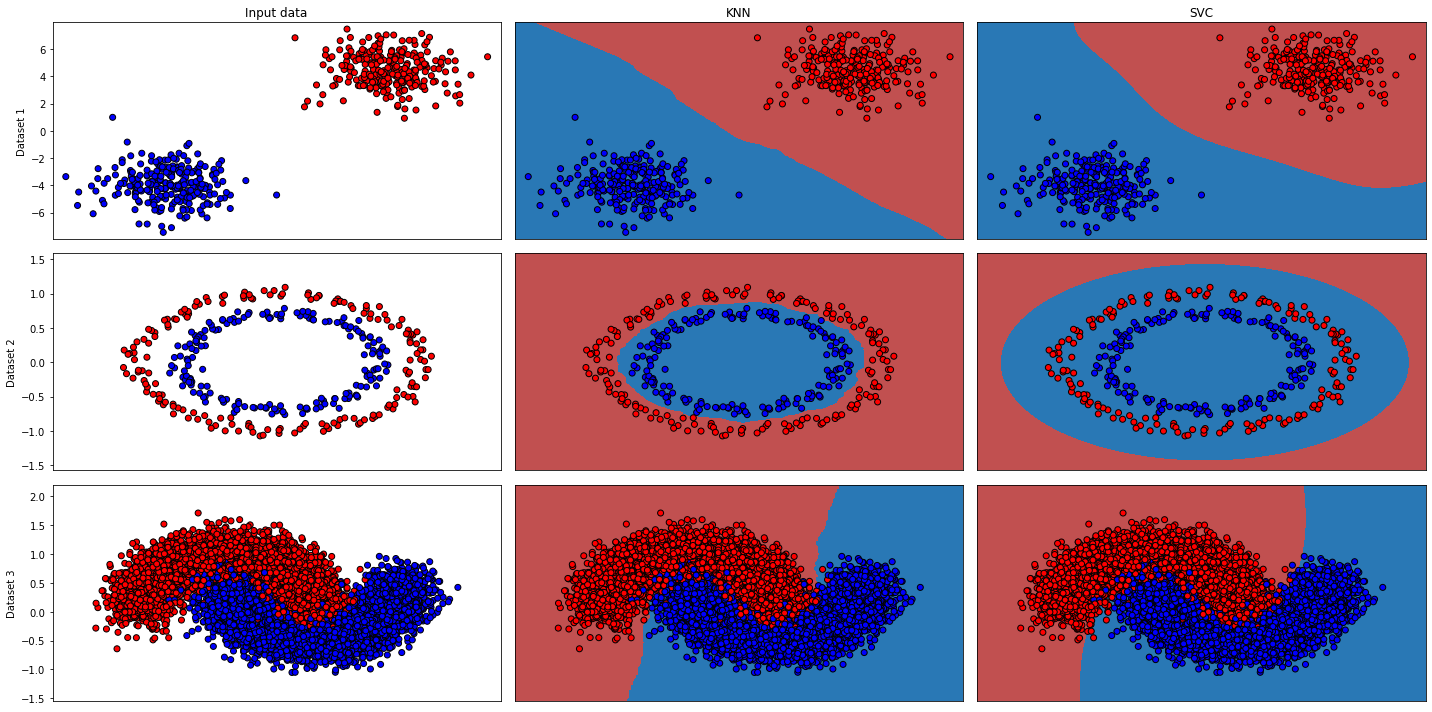

In [39]:
"""
Code from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Adapted for ML Practice for: David Pedroza Segoviano
"""

# Importing Important Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Importing something for file reading
from algorithms.read import read_files

# step size in the mesh
h = .02

# List of names of the classifier 
names = ["KNN", "SVC"]
# List of the classifier
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=10, gamma=0.1)]

# Reading my datasets (there are 3 of them)
datasets = read_files()

# Creating a figure
figure = plt.figure(figsize=(20, 10))
i = 1 # Subplot index

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Separate our data into coords (x1,x2) and label (y)
    X, y = ds
    # Calculate the max and the min for meshgrid creation
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the dataset
    cm = ListedColormap(['#c15050','#2978b5']) # Decision Boundary colors
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) # Points color
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i) # Subplot
    
    # Set the title
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')

    # Set some plotting things
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_ylabel(f"Dataset {ds_cnt+1}") # Dataset name
    ax.set_xticks(())
  
    i += 1 # Index + 1

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X, y) # Train the classifier with the dataset

        # Assing a color to each point in the mesh
        # Depending on the classifier
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        # Plot the Decision Boundary color
        ax.contourf(xx, yy, Z, cmap=cm, alpha=1)

        # Plot again the points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='k')

        # Set up some graph properties 
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        i += 1 # Index

# Plotting the solution
plt.tight_layout()
plt.show()